In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!nvidia-smi

Sun Mar 19 17:12:21 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P0    30W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# **Transfer Learning VGG 16 and 19 using keras**

In [3]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.vgg16 import VGG16
import numpy as np
from glob import glob

In [4]:
# re_size the image

IMAGE_SIZE = [224,224]

train_path = '/content/drive/MyDrive/Deep Learning/Cotton disease Analysis/data/train' 
val_path = '/content/drive/MyDrive/Deep Learning/Cotton disease Analysis/data/val'

In [5]:
# iporting the vgg16 library as show below and add preprocessing layer

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [6]:
for layer in vgg16.layers:
  layer.trainable = False

In [7]:
for layer in vgg16.layers:
  print(layer.name , layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [8]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:
folders = glob('/content/drive/MyDrive/Deep Learning/Cotton disease Analysis/data/train/*')

In [10]:
folders

['/content/drive/MyDrive/Deep Learning/Cotton disease Analysis/data/train/diseased cotton leaf',
 '/content/drive/MyDrive/Deep Learning/Cotton disease Analysis/data/train/fresh cotton leaf',
 '/content/drive/MyDrive/Deep Learning/Cotton disease Analysis/data/train/diseased cotton plant',
 '/content/drive/MyDrive/Deep Learning/Cotton disease Analysis/data/train/fresh cotton plant']

In [11]:
len(folders)

4

In [12]:
model = Sequential()

model.add(vgg16)
model.add(Flatten())
model.add(Dense(256,activation = "relu"))
model.add(Dense(4,activation = "softmax"))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 21,138,500
Trainable params: 6,423,812
Non-trainable params: 14,714,688
_________________________________________________________________


In [14]:
# Intialization of the cost function and the optimizer

model.compile(
    loss = "categorical_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Deep Learning/Cotton disease Analysis/data/train',
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical'
                                                 )

Found 1961 images belonging to 4 classes.


In [18]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Deep Learning/Cotton disease Analysis/data/val',
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 324 images belonging to 4 classes.


In [19]:
# fit the model

r = model.fit(
    training_set,
    validation_data = test_set,
    epochs = 22,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set)
)

Epoch 1/22
62/62 [==============================] - 473s 7s/step - loss: 1.4109 - accuracy: 0.7149 - val_loss: 0.2549 - val_accuracy: 0.9043
Epoch 2/22
62/62 [==============================] - 41s 662ms/step - loss: 0.2520 - accuracy: 0.9067 - val_loss: 0.2020 - val_accuracy: 0.9259
Epoch 3/22
62/62 [==============================] - 41s 663ms/step - loss: 0.1910 - accuracy: 0.9312 - val_loss: 0.1462 - val_accuracy: 0.9414
Epoch 4/22
62/62 [==============================] - 41s 661ms/step - loss: 0.1889 - accuracy: 0.9281 - val_loss: 0.2852 - val_accuracy: 0.8858
Epoch 5/22
62/62 [==============================] - 41s 662ms/step - loss: 0.1143 - accuracy: 0.9577 - val_loss: 0.2258 - val_accuracy: 0.9136
Epoch 6/22
62/62 [==============================] - 41s 665ms/step - loss: 0.0840 - accuracy: 0.9699 - val_loss: 0.1580 - val_accuracy: 0.9352
Epoch 7/22
62/62 [==============================] - 41s 661ms/step - loss: 0.0618 - accuracy: 0.9801 - val_loss: 0.1260 - val_accuracy: 0.9537
E

In [20]:
import matplotlib.pyplot as plt

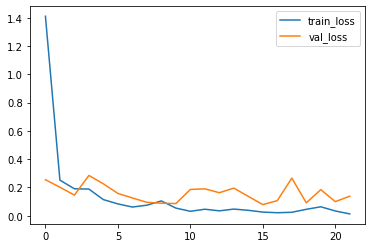

<Figure size 432x288 with 0 Axes>

In [21]:
# pllotting the loss

plt.plot(r.history['loss'],label = 'train_loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()
plt.savefig('lossvall_loss')

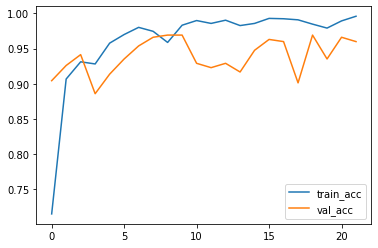

<Figure size 432x288 with 0 Axes>

In [22]:
# plotting the accuracy 
plt.plot(r.history['accuracy'],label = 'train_acc')
plt.plot(r.history['val_accuracy'],label = 'val_acc')
plt.legend()
plt.show()
plt.savefig('accuracyfig')

In [23]:
# Saving the model as h5 file

from tensorflow.keras.models import load_model

model.save('modelvgg16.h5')

In [24]:
y_pred = model.predict(test_set)

11/11 [==============================] - 3s 262ms/step


In [25]:
y_pred

array([[6.1544291e-08, 8.6004138e-01, 2.1967200e-08, 1.3995847e-01],
       [5.4477358e-08, 9.9999273e-01, 3.8791562e-08, 7.1955533e-06],
       [1.8323988e-04, 2.1951155e-04, 9.9487668e-01, 4.7205193e-03],
       ...,
       [5.2079560e-07, 9.8054296e-01, 4.1675754e-04, 1.9039758e-02],
       [2.7117196e-03, 1.1871144e-04, 9.9716944e-01, 1.7190813e-07],
       [7.2023504e-08, 9.9978691e-01, 3.3282550e-08, 2.1296975e-04]],
      dtype=float32)

In [26]:
import numpy as np

y_pred = np.argmax(y_pred,axis = 1)

In [27]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [28]:
model = load_model('modelvgg16.h5')

In [30]:
img = image.load_img('/content/drive/MyDrive/Deep Learning/Cotton disease Analysis/data/train/diseased cotton leaf/dis_leaf (1)_iaip.jpg',target_size = (224,224))

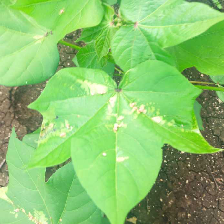

In [31]:
img

In [32]:
x=image.img_to_array(img)
x

array([[[133., 208.,  90.],
        [123., 198.,  80.],
        [132., 207.,  89.],
        ...,
        [ 82., 105.,  63.],
        [117., 138., 105.],
        [124., 145., 112.]],

       [[131., 205.,  90.],
        [138., 212.,  97.],
        [141., 215., 100.],
        ...,
        [ 95., 118.,  89.],
        [108., 129.,  96.],
        [ 75.,  96.,  63.]],

       [[122., 196.,  85.],
        [143., 217., 106.],
        [141., 215., 104.],
        ...,
        [ 73.,  98.,  79.],
        [ 98., 119.,  86.],
        [ 96., 117.,  84.]],

       ...,

       [[162., 219., 150.],
        [164., 221., 152.],
        [161., 218., 149.],
        ...,
        [122., 108.,  81.],
        [115.,  98.,  70.],
        [119., 102.,  74.]],

       [[162., 215., 147.],
        [166., 219., 151.],
        [164., 217., 149.],
        ...,
        [135., 120.,  99.],
        [130., 112.,  92.],
        [126., 108.,  88.]],

       [[159., 212., 144.],
        [166., 219., 151.],
        [166., 2

In [33]:
x.shape

(224, 224, 3)

In [34]:
x=x/255

In [35]:
from keras.applications.vgg16 import preprocess_input
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [36]:
model.predict(img_data)

1/1 [==============================] - 1s 809ms/step


array([[9.99999881e-01, 1.27123811e-09, 1.15762395e-08, 8.03981095e-08]],
      dtype=float32)

In [37]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 21ms/step


In [38]:
a

array([0])

In [39]:
cotton_disease = ["diseased cotton leaf","fresh cotton leaf","diseased cotton plant","fresh cotton plant"]

In [40]:
cotton_disease[a[0]]

'diseased cotton leaf'